
# Project: Investigate a Dataset (TMDb Movie Data )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#import_check">Import and Check</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#data_cleaning">Data Cleaning</a></li>
<li><a href="#describtive_statistics">Descriptive Statistics</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#researcher_name">Researcher Name</a></li>
   
</ul>


<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> Q1
What is the relationship between Genres and Revenue? What is the best geners to get highest revenue?

> Q2
What is the relationship between Revenue and Runtime? What is the best runtime to get highest revenue?

> Q3
What is top five production companies?as a company, How i can produce my film?

> Q4
What is relationship between runtime and  rating? What is the range of runtime can we make our film?

>Q5
What is best 10 actors in movie's cast? Who has good qualifications and good knowledge

>Q6
What is the correlation between revenue and popularity?

>Q7
What is corelation between revenue and budget? 

>Q8
What year was the largest number of films produced?

>Q9
What is the genres of movies with high revenue in 2011? Can you compare it with the general genres?

>Q10
When families love watching movies? What month is considered "best" for releasing a movie? 

<a id='import_check'></a>

## Import liberaries and Check all things ready :) 

In [1]:
#importing necessary liberaries for analysis :) 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling


In [2]:
#load dataset
df=pd.read_csv('tmdb-movies.csv')


In [3]:
#check that dataset is loaded and show columns of datasest :)
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
# know the dimensions of our dataset
df.shape

(10866, 21)

In [5]:
# check if there are columns have a Null valuse of not 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# we need to determine the object columns which will be string data types :( 
df.dtypes[df.dtypes=='object']


imdb_id                 object
original_title          object
cast                    object
homepage                object
director                object
tagline                 object
keywords                object
overview                object
genres                  object
production_companies    object
release_date            object
dtype: object

In [7]:
def obj_type(colname):
    return type(df[colname][0])

In [8]:
# verify that all object types are string 
obj_type('imdb_id')

str

In [9]:
#check that function work correctly :)
if type(df['imdb_id'][0])==obj_type('imdb_id'):
    print("yeeees! function works well :) ")

yeeees! function works well :) 


In [10]:
obj_type('original_title')

str

In [11]:
obj_type('cast')

str

In [12]:
obj_type('release_date')

str

<a id='data_cleaning'></a>
## Data Cleaning ( remove duplicates and null values)

In [13]:
#check duplicated rows
df.duplicated().sum()

1

In [14]:
# get the duplicated row
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [15]:
# drop duplicate row :)
df.drop_duplicates(inplace=True)

In [16]:
# check again for duplicates
if not df.duplicated().sum():
    print("Awesome, there are no duplicates :)")

Awesome, there are no duplicates :)


In [17]:
#chek for null values 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [18]:
#drop all null values :)
df.dropna(inplace =True)

In [19]:
# check again for nulls 
df.isnull().sum()


id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [20]:
print("Awesome, there are no nulls :)")

Awesome, there are no nulls :)


<a id='describtive_statistics'></a>

## Describtive Statistics for know deeply about data :) 

In [21]:
# look at some useful statistice about dataset to prepare some good questions :) 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,71652.152108,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,2007.796687,3.627376e+07,1.302391e+08
std,92355.883915,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,7.549224,5.129783e+07,2.564338e+08
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00
25%,9699.000000,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,2006.000000,0.000000e+00,0.000000e+00
50%,35112.500000,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,2010.000000,1.524601e+07,2.806370e+07
75%,83573.000000,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000,5.064450e+07,1.393645e+08
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


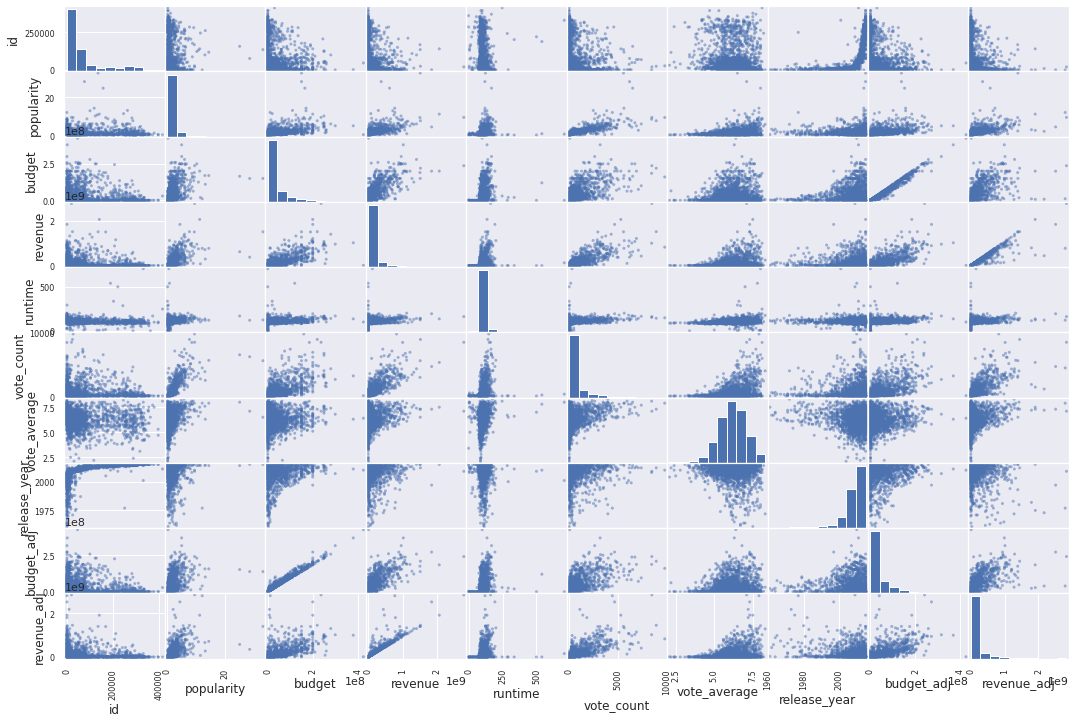

In [22]:
# show relationships in data using plots to imagine first impresion about it
pd.plotting.scatter_matrix(df,figsize=(18,12))
plt.show()

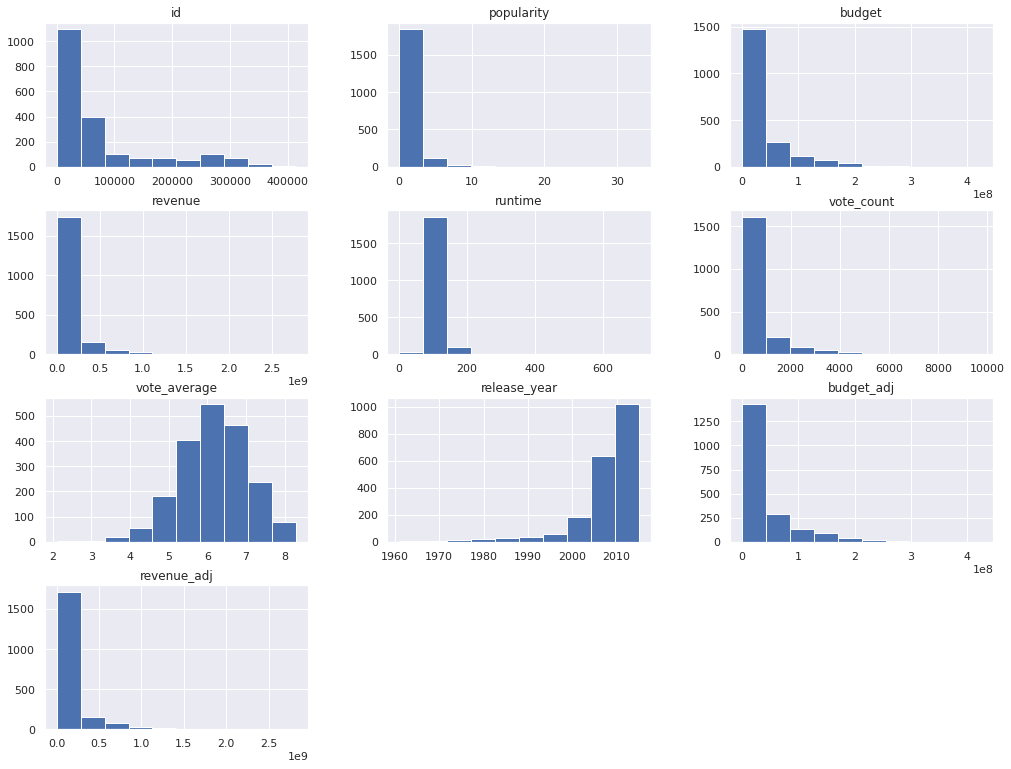

In [23]:
# histograms for more details
df.hist(figsize=(17,13));

<a id='eda'></a>
## Exploratory Data Analysis


## Q1
### What is the relationship between Genres and Revenue? What is the best geners to get highest revenue?

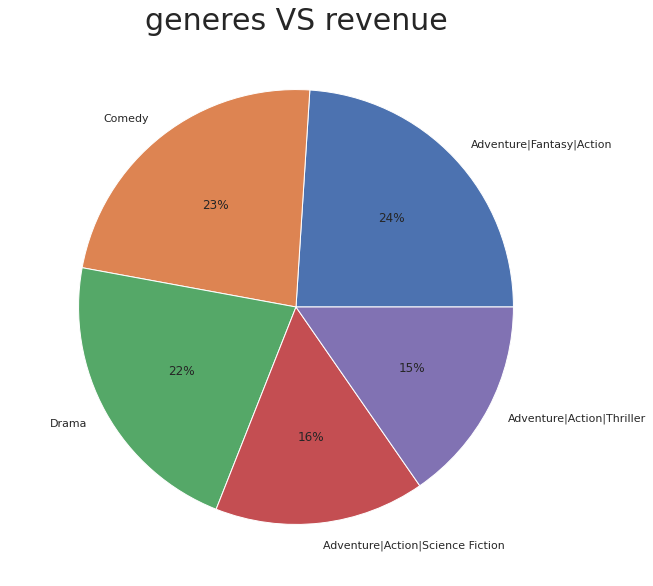

In [24]:
# after filtering dataset by genres i sort the value descending and get first 5
df[df['revenue']!=0].groupby('genres')['revenue'].sum().sort_values(ascending=False).head(5).plot(kind='pie',figsize=(12,10),autopct='%1.0f%%')
plt.title("generes VS revenue",fontsize=30)
plt.ylabel(' ');

Acording to this pie chart: Adventure|Fantasy|Action, Comedy and Drama are the highst genres revenue

## Q2
### What is the relationship between Revenue and Runtime? What is the best runtime to get highest revenue?

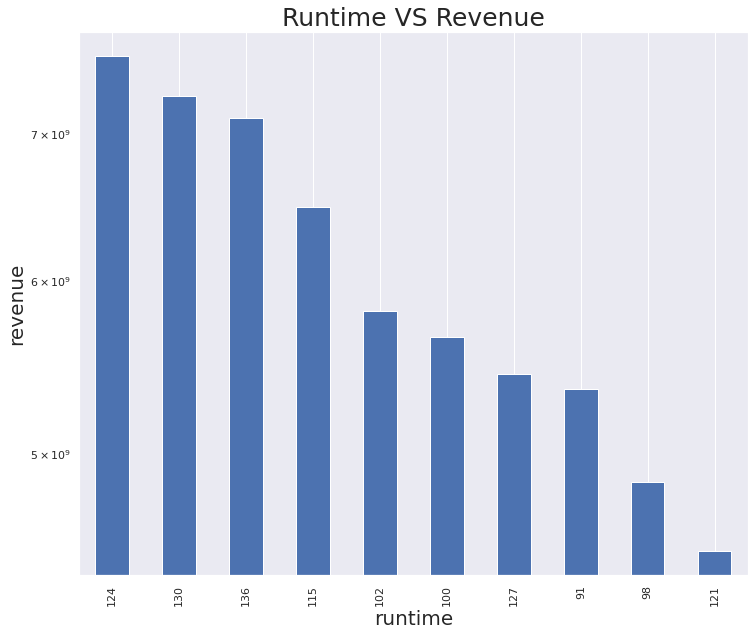

In [25]:
# after filtering dataset by runtime i sort them descending and get first 10 to know best run time :) 
df[df['revenue']!=0].groupby('runtime')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(12,10)).set_yscale('log')
plt.title("Runtime VS Revenue",fontsize=25)
plt.xlabel('runtime',fontsize=20)
plt.ylabel('revenue',fontsize=20);

the above chart shows that highst movies revenue runtime, it should be considered to be  runtime is between 115 to 130 and the best is 120 minutes on average

## Q3
## What is top five production companies?as a company, How i can produce my film?

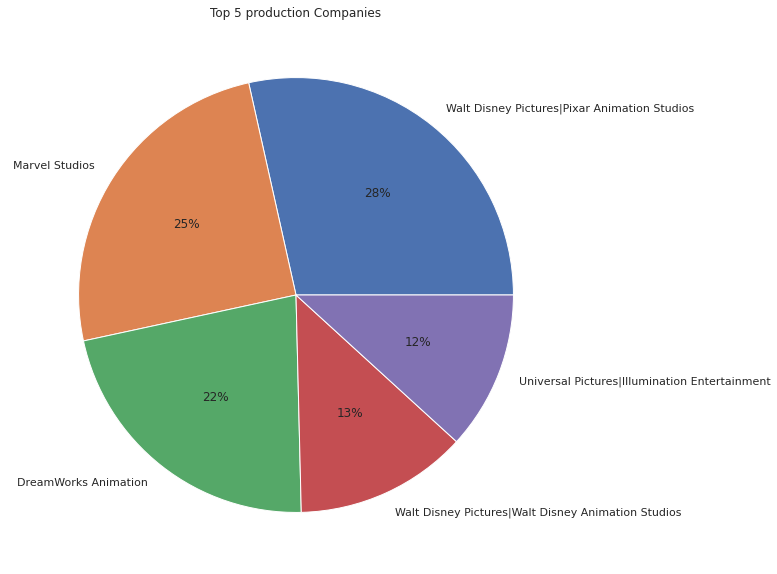

In [26]:
#pie chart for top five 
df[df['revenue']>0].groupby('production_companies')['revenue'].sum().sort_values(ascending=False).head(5).plot(kind='pie',figsize=(12,10),autopct='%1.0f%%')
plt.title('Top 5 production Companies')
plt.ylabel(' ');

this pie chart shows that best companies to follow thier steps  :)

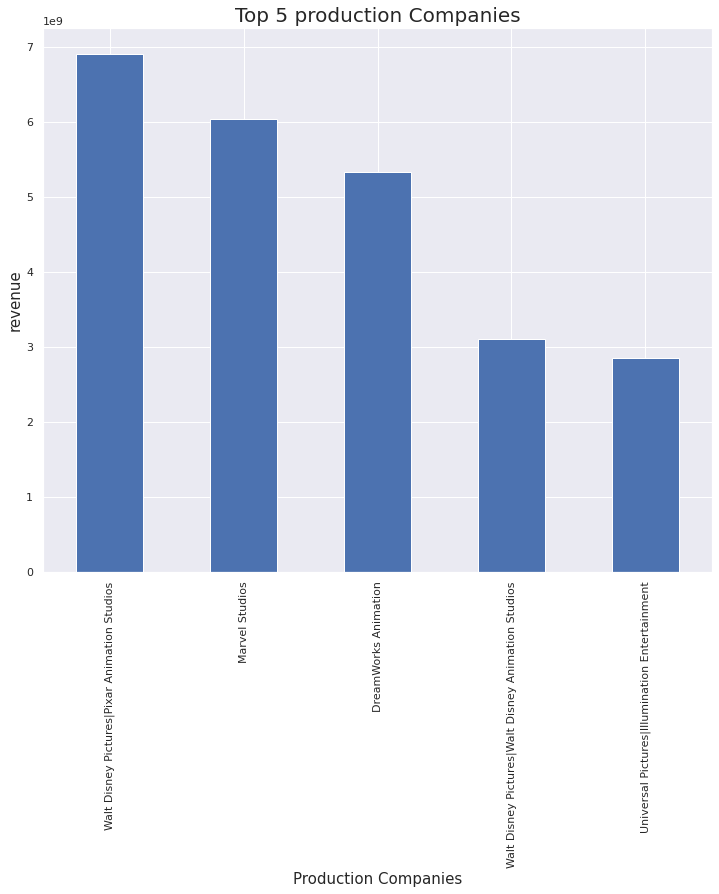

In [37]:
# bar chart for top five
df[df['revenue']>0].groupby('production_companies')['revenue'].sum().sort_values(ascending=False).head(5).plot(kind='bar',figsize=(12,10))
plt.title('Top 5 production Companies',fontsize=20)
plt.xlabel('Production Companies',fontsize=15)
plt.ylabel('revenue',fontsize=15);

this bar chart also shows that best companies to follow thier steps  :)

## Q4
## What is relationship between runtime and  rating? What is the range of runtime can we make our film?

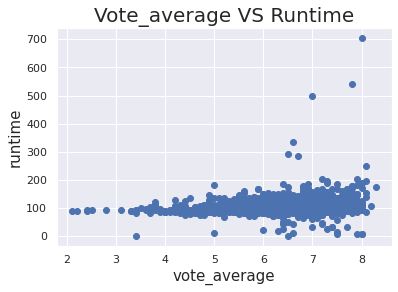

In [38]:
# to help us know about the runtime of movies and correct range 
plt.scatter(df['vote_average'],df['runtime'])
plt.title('Vote_average VS Runtime',fontsize=20)
plt.xlabel('vote_average',fontsize=15)
plt.ylabel('runtime',fontsize=15);

this scatter shows the best runtime range to make/watch good film 

## Q5
## What is best 10 actors in movie's cast? Who has good qualifications and good knowledge

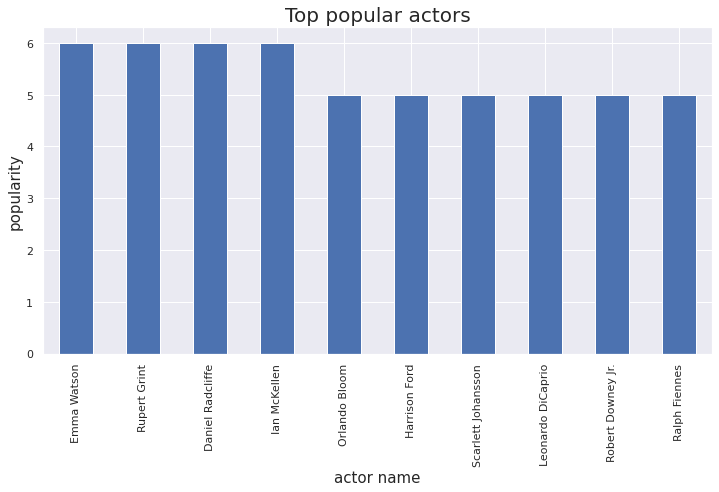

In [47]:
f100 = df.sort_values(by='popularity', ascending=False).head(100)
f100cast = pd.Series(f100['cast'].str.cat(sep='|').split('|'))
frequent_cast_in_f100cast = f100cast.value_counts(ascending=False).head(10)
frequent_cast_in_f100cast.plot(kind='bar', figsize=(12, 6))
plt.title('Top popular actors',fontsize=20)
plt.xlabel('actor name',fontsize=15)
plt.ylabel('popularity',fontsize=15);

Thsi bar chart let us know the actors should be in the movie which we produce/watch or at least one of them

## Q6
## What is the correlation between revenue and popularity?

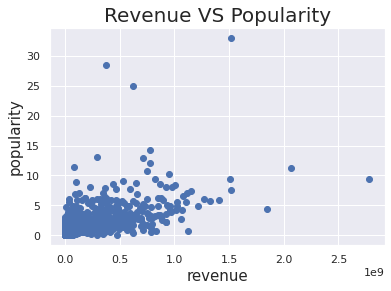

In [30]:
#need to verify that the popular movies get good revenue and what is the relationship between them
plt.scatter(df['revenue'],df['popularity'])
plt.title('Revenue VS Popularity',fontsize=20)
plt.xlabel('revenue',fontsize=15)
plt.ylabel('popularity',fontsize=15);

There are positive corelation between popularity and revenue. This relationship make us try to simulate most popular movies to get high revenue :)

## Q7
## What is corelation between revenue and budget? 

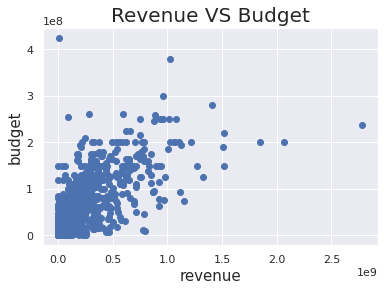

In [31]:
#if i invieste more in production of movie can it increase revenue ?
plt.scatter(df['revenue'],df['budget'])
plt.title("Revenue VS Budget",fontsize=20)
plt.xlabel('revenue',fontsize=15)
plt.ylabel('budget',fontsize=15)
plt.show;

There are positive corelation between revenue and budget. This make us invest more to earn more :)

## Q8
## What year was the largest number of films produced?

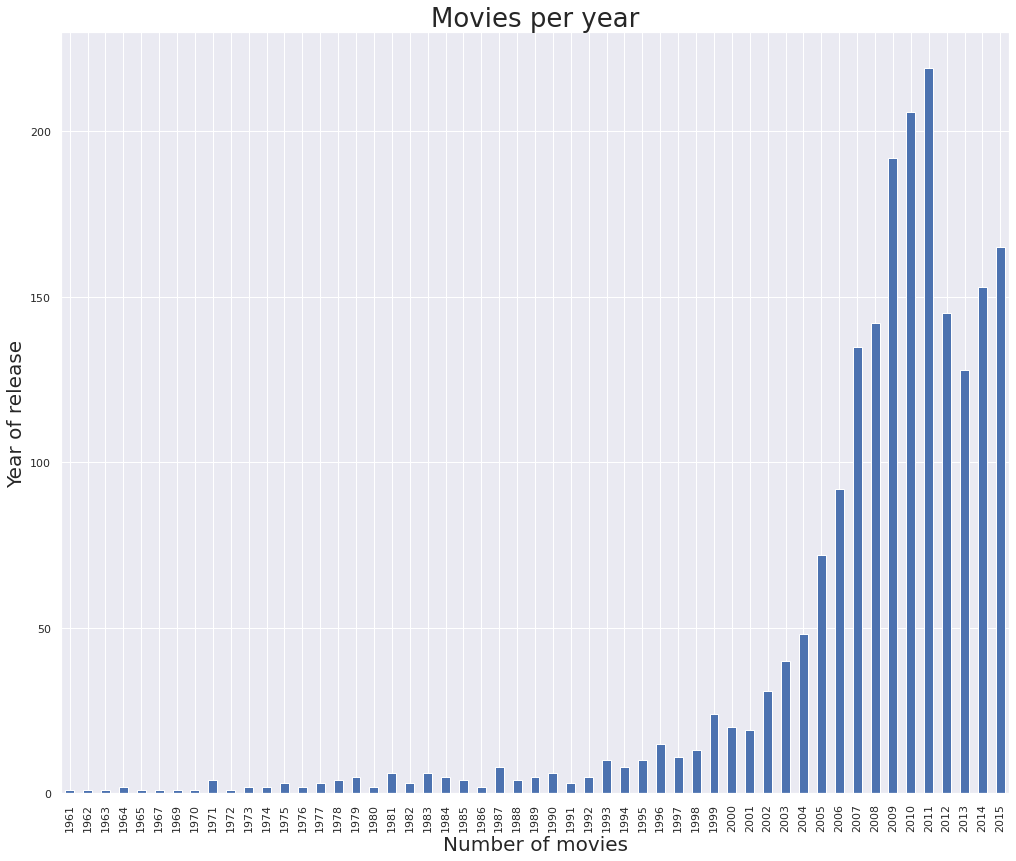

In [32]:
#knowing the highs year in movies numbers to analyze it
df.groupby('release_year')['original_title'].count().plot(kind='bar',figsize=(17,14))
plt.title('Movies per year',fontsize=26)
plt.xlabel('Number of movies',fontsize=20)
plt.ylabel('Year of release',fontsize=20);

This bar chart show us number of movies per year

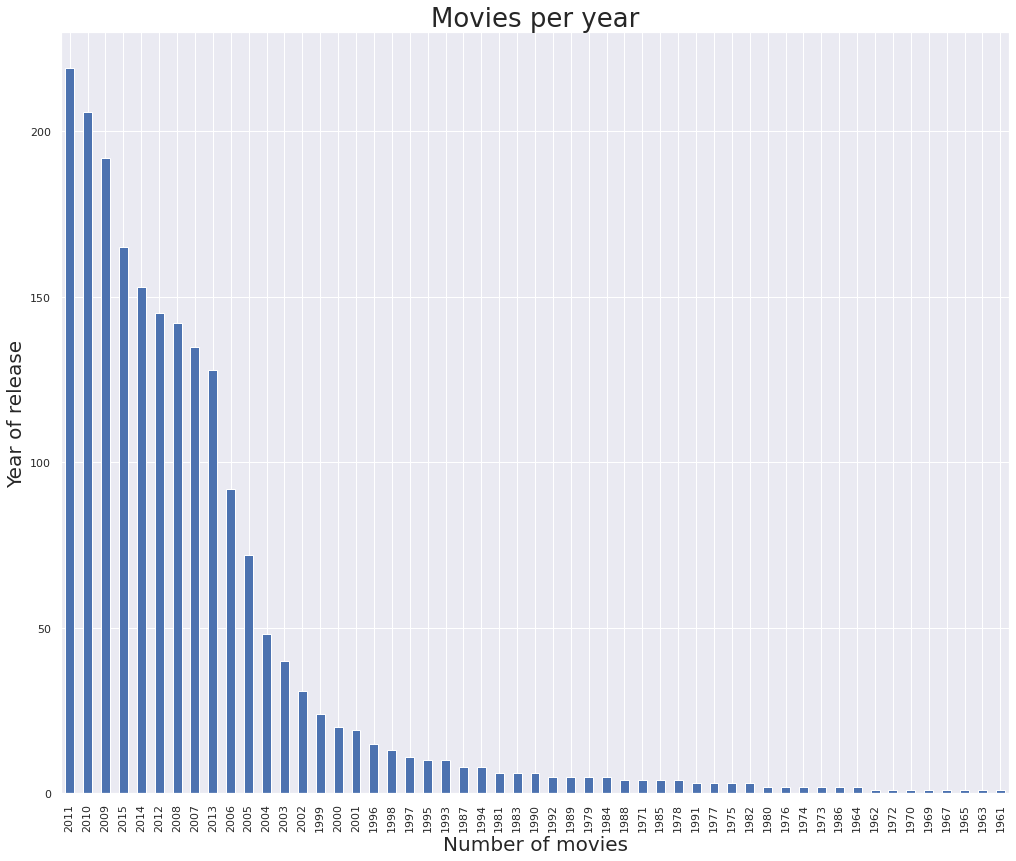

In [33]:
# arrange them to know the most year in production movies
df.groupby('release_year')['original_title'].count().sort_values(ascending=False).plot(kind='bar',figsize=(17,14))
plt.title('Movies per year',fontsize=26)
plt.xlabel('Number of movies',fontsize=20)
plt.ylabel('Year of release',fontsize=20);

This bar chart arrange them descending to know the most one :)

## Q9
## What is the genres of movies with high revenue in 2011? Can you compare it with the general genres?


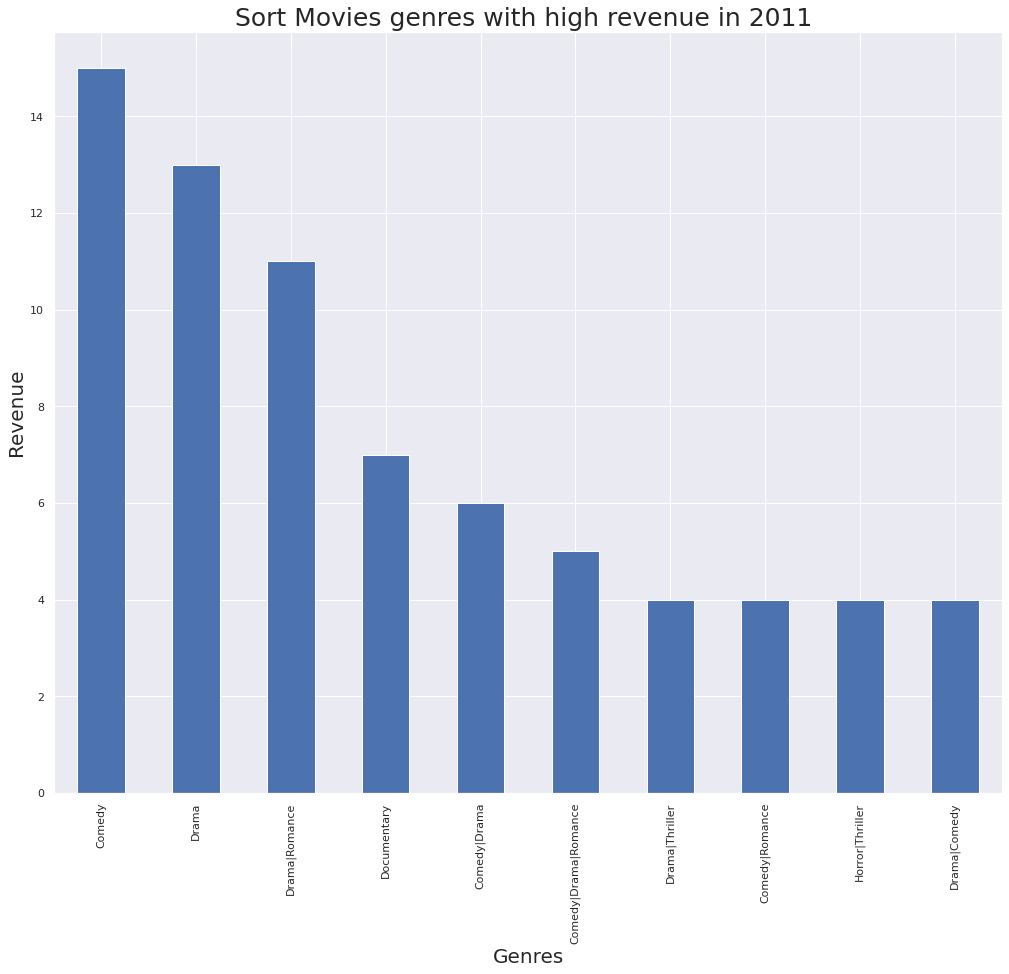

In [48]:
#
df[df['release_year']==2011].groupby('genres')['revenue'].count().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(17,14))
plt.title('Sort Movies genres with high revenue in 2011 ',fontsize=25)
plt.xlabel('Genres',fontsize=20)
plt.ylabel('Revenue',fontsize=20);

This is show us top genres in 2011 


## Q 10
## When families love watching movies? What month is considered "best" for releasing a movie? 

In [35]:
# determine the best months for choose the date of release :)
df['release_date']=pd.to_datetime(df['release_date'])
months=df['release_date'].dt.month

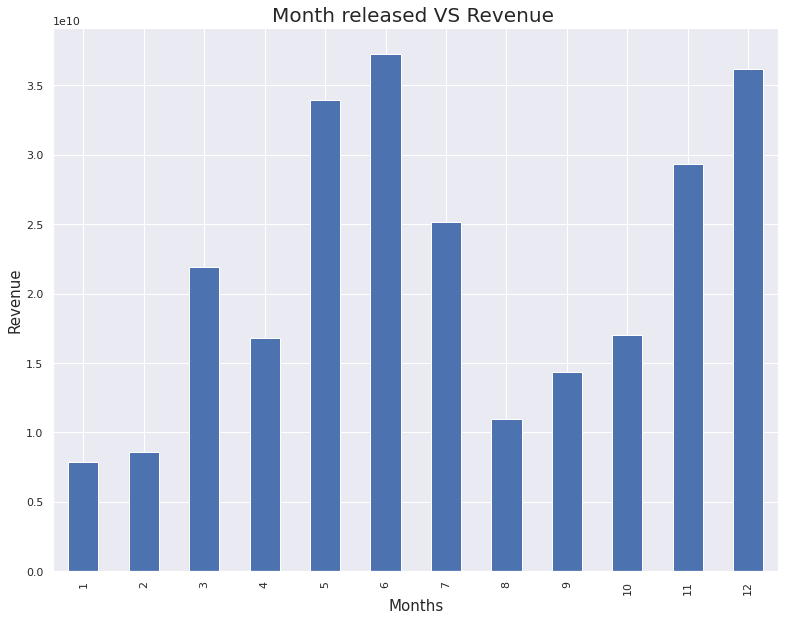

In [36]:
# show graph to know the best two months 
df.groupby(months)['revenue_adj'].sum().plot(kind='bar',figsize=(13,10))
plt.title('Month released VS Revenue ',fontsize=20)
plt.xlabel('Months',fontsize=15)
plt.ylabel('Revenue',fontsize=15);

This display revenue in each month. This help us ot determine the best month to release month

<a id='conclusions'></a>
## Conclusions


After analyzing this huge valuable dataset, I could answer my questions and understand the relations between columns and could extract useful information from it to help two types of people: 
1. Decision-makers in production companies 
2. People who watch movies
and I will give my recommendation for them now about my analysis.

>-First, Decision-makers in production companies:
you need to release your film in June or December. The popularity is very high in this months. your movie needs to be one of these genres ( Action| Fantasia | Adventure, Comedy or Drama) but according to 2011, I recommend comedy movies. you need to follow the steps of Walt Disney Pictures, Pixar Animation Studios, or Marvel Studio to put your successful production plan. when selecting actors team you should make sure that one of those is in your team ( Emma Watson, Rupert Grint, Daniel Radcliffe, Ian McKellen, Orlando Bloom, Harrison Ford, Scarlett Johansson, Leonardo DiCaprio, Robert Downey Jr., Ralph Fiennes). the runtime of the movie is very important to be from 90 to 130 minutes on average. finally don't hesitate to invest in production my analysis shows that more investment more revenue (positive relationship).

>-Second, People who watch movies:
you need to search for high rating movies and focus on comedy, Action, Science fiction, or Drama movies which runtime is between 120 minutes on average and one of these actors appear in it (( Emma Watson, Rupert Grint, Daniel Radcliffe, Ian McKellen, Orlando Bloom, Harrison Ford, Scarlett Johansson, Leonardo DiCaprio, Robert Downey Jr., Ralph Fiennes). remember that I only suggest to you and you have the choice to watch any movie but if you take my advice into consideration make sure that you will get full entertainment 


<a id='researcher_name'></a>

# Researcher Name:

>                           Ibrahim Ehab Abdelmaged :)

## Resources:

> https://pandas.pydata.org/docs/

> https://matplotlib.org/

> https://review.udacity.com/#!/rubrics/107/view 

> cheat sheet pdf given from Udacity  :)
